In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [ ]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(pos, rows, cols, grid):
    x, y = pos
    neighbors = []
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy

        if 0 <= nx < rows and 0 <= ny < cols and grid[nx, ny] != float('inf'):
            neighbors.append((nx, ny))

    return neighbors

def reconstruct_path(visited_path, current, grid):
    path = [current]
    cost = 0
    
    while current in visited_path:
        current = visited_path[current]
        cost += grid[current]
        path.append(current)

    path.reverse()
    print(f"Total Path Cost: {cost}")
    
    return path

def add_obstacles(grid, obstacles):
    for obs in obstacles:
        grid[obs] = float('inf')

def add_penality_regions(grid, penalty_regions, penalty_cost):
    for region_start, region_end in penalty_regions:
        for i in range(region_start[0], region_end[0] + 1):
            for j in range(region_start[1], region_end[1] + 1):
                grid[i, j] += penalty_cost

In [ ]:
def a_star(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    visited_path = {}
    explored_nodes = set()
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    heapq.heappush(open_set, (0, start))
    
    while open_set:
        _, current = heapq.heappop(open_set)
        
        if current == goal:
            return reconstruct_path(visited_path, current, grid), explored_nodes
        
        for neighbor in get_neighbors(current, rows, cols, grid):
            a = 100 if current[0] == 14 and current[1] == 18 else 0
            tentative_g_score = g_score[current] + grid[neighbor] + a

            if tentative_g_score < g_score.get(neighbor, float('inf')):                
                visited_path[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)    
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
        
        explored_nodes.add(current)
    
    return None, explored_nodes

SyntaxError: invalid syntax (790278369.py, line 18)

In [ ]:
def dijkstra(grid, start, goal):
    rows, cols = grid.shape
    open_set = []
    visited_path = {}
    explored_nodes = set()
    dist = {start: 0}    
    
    heapq.heappush(open_set, (0, start))
    
    while open_set:
        _, current = heapq.heappop(open_set)
        
        if current == goal:
            return reconstruct_path(visited_path, current, grid), explored_nodes
        
        for neighbor in get_neighbors(current, rows, cols, grid):
            tentative_dist = dist[current] + grid[neighbor]
            if tentative_dist < dist.get(neighbor, float('inf')):
                visited_path[neighbor] = current
                dist[neighbor] = tentative_dist
                heapq.heappush(open_set, (tentative_dist, neighbor))

        explored_nodes.add(current)
    
    return None, explored_nodes 

In [ ]:
def bfs(grid, start, goal):
    rows, cols = grid.shape
    queue = [start]
    visited_path = {}
    explored_nodes = set()
    visited = set()

    visited.add(start)

    while queue:
        current = queue.pop(0)
        
        if current == goal:
            return reconstruct_path(visited_path, current, grid), explored_nodes
        
        for neighbor in get_neighbors(current, rows, cols, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                visited_path[neighbor] = current
                queue.append(neighbor)
        
        explored_nodes.add(current)
    
    return None, explored_nodes

In [ ]:
def dfs(grid, start, goal):
    rows, cols = grid.shape
    stack = [start]
    visited_path = {}
    explored_nodes = set()
    visited = set()

    visited.add(start)

    while stack:
        current = stack.pop()
        
        if current == goal:
            return reconstruct_path(visited_path, current, grid), explored_nodes
        
        for neighbor in get_neighbors(current, rows, cols, grid):
            if neighbor not in visited:
                visited.add(neighbor)
                visited_path[neighbor] = current
                stack.append(neighbor)
        
        explored_nodes.add(current)
    
    return None, explored_nodes

Total Path Cost: 64.0


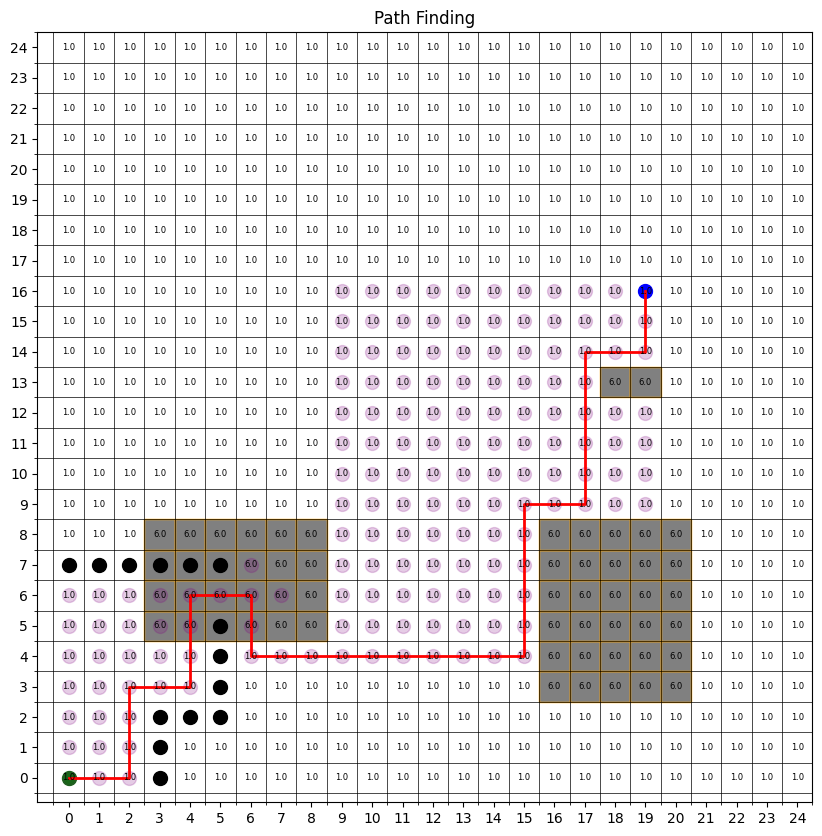

In [ ]:
grid_size = (25, 25)
grid = np.ones(grid_size)

obstacles = [(0, 3), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (7, 5), (7, 4), (7, 3), (7, 2), (7, 0), (7, 1)]
add_obstacles(grid, obstacles)

penalty_regions = [((5, 3), (8, 8)), ((3, 16), (8, 20)), ((13, 18), (13, 19))]
penalty_cost = 5
add_penality_regions(grid, penalty_regions, penalty_cost)

start = (0, 0)
goal = (16, 19)

path, explored_nodes = a_star(grid, start, goal)

def plot_grid(grid, start, goal, path, explored_nodes, penalty_regions, obstacles):
    rows, cols = grid.shape
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.scatter(start[1], start[0], color='green', label="Start", s=100)
    ax.scatter(goal[1], goal[0], color='blue', label="Goal", s=100)
    
    for i in range(rows):
        for j in range(cols):
            ax.text(j, i, f"{grid[i, j]:.1f}", color="black", ha="center", va="center", fontsize=6)

    for region_start, region_end in penalty_regions:
        for i in range(region_start[0], region_end[0] + 1):
            for j in range(region_start[1], region_end[1] + 1):
                rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='orange', facecolor='gray', label="Penalty Region" if (i, j) == region_start else "")
                ax.add_patch(rect)
    
    for obs in obstacles:
        ax.scatter(obs[1], obs[0], color='black', s=100, label="Obstacle" if obs == obstacles[0] else "")

    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_y, path_x, color='red', linewidth=2, label="Path")        
    
    explored_x, explored_y = zip(*explored_nodes) if explored_nodes else ([], [])
    ax.scatter(explored_y, explored_x, color='purple', s=100, label="Explored Nodes", alpha=0.2)
    
    ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows)) 
    ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.set_title("Path Finding")
    plt.show()

plot_grid(grid, start, goal, path, explored_nodes, penalty_regions, obstacles)